In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

%matplotlib inline

In [2]:
import sklearn.linear_model as skl
import sklearn.model_selection as skm
import statsmodels.api as sm
from ISLP import confusion_table, load_data
from ISLP.models import ModelSpec as MS
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay, accuracy_score
from sklearn.svm import SVC

roc_curve = RocCurveDisplay.from_estimator  # shorthand

## Conceptual


### **Q1.**

**(a)** 

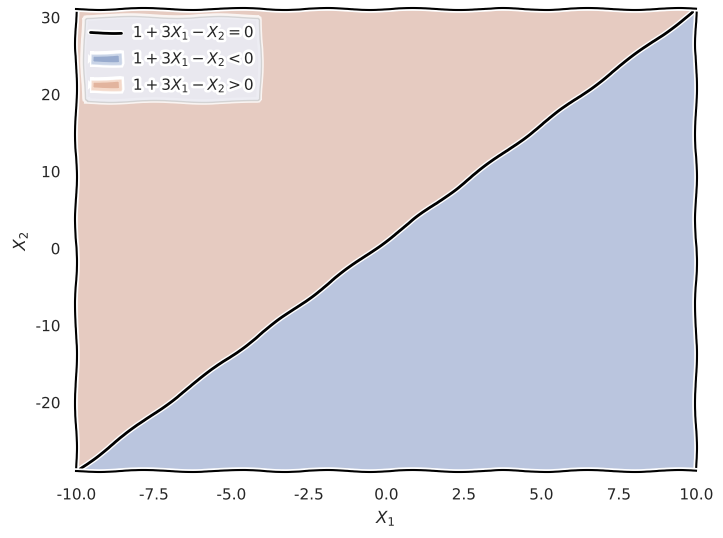

In [3]:
with plt.xkcd():
    plt.rcParams["font.family"] = "DejaVu Sans"  # to get rid of xkcd font warnings

    x1 = np.linspace(-10, 10, 400)
    x2 = 1 + 3 * x1

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(x1, x2, color="black", label=r"$ 1 + 3 X_1 - X_2 = 0 $")

    x2_min, x2_max = x2.min(), x2.max()

    ax.fill_between(x1, x2_min, x2, alpha=0.3, label=r"$ 1 + 3 X_1 - X_2 < 0 $")
    ax.fill_between(x1, x2, x2_max, alpha=0.3, label=r"$ 1 + 3 X_1 - X_2 > 0 $")

    # # remove padding so the shading fills the plot
    ax.margins(x=0, y=0)
    ax.set_xlim(x1.min(), x1.max())
    ax.set_ylim(x2_min, x2_max)

    ax.set_xlabel("$X_1$")
    ax.set_ylabel("$X_2$")
    ax.legend()
    plt.show()

**(b)**

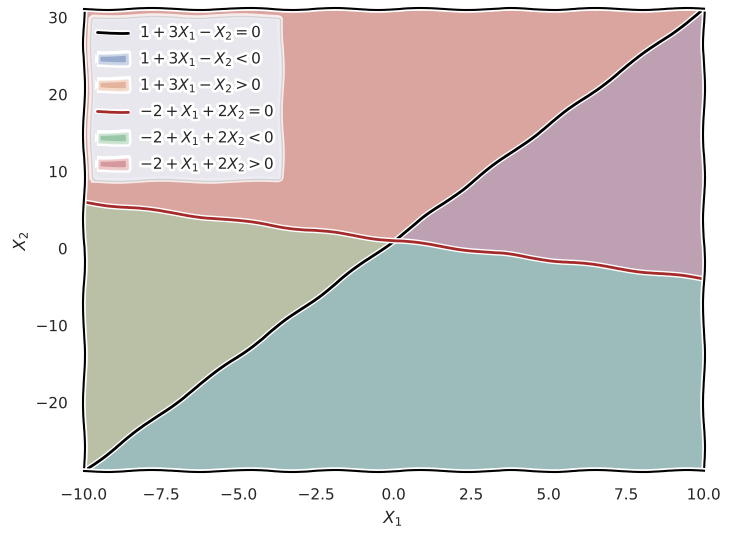

In [4]:
with plt.xkcd():
    plt.rcParams["font.family"] = "DejaVu Sans"  # to get rid of xkcd font warnings
    x1 = np.linspace(-10, 10, 400)
    x2 = 1 - 0.5 * x1

    # fig, ax = plt.subplots()
    ax.plot(x1, x2, color="brown", label=r"$ -2 + X_1 + 2 X_2 = 0 $")

    ax.fill_between(x1, x2_min, x2, alpha=0.3, label=r"$ -2 + X_1 + 2 X_2 < 0 $")
    ax.fill_between(x1, x2, x2_max, alpha=0.3, label=r"$ -2 + X_1 + 2 X_2 > 0 $")

    ax.legend()
fig

The regions are a little hard to tell apart using legend because of the overlapping colors but the question asked for both on the same plot, though it's obvious what is referred to by each region.

### **Q2**


**(a)**, **(b)**

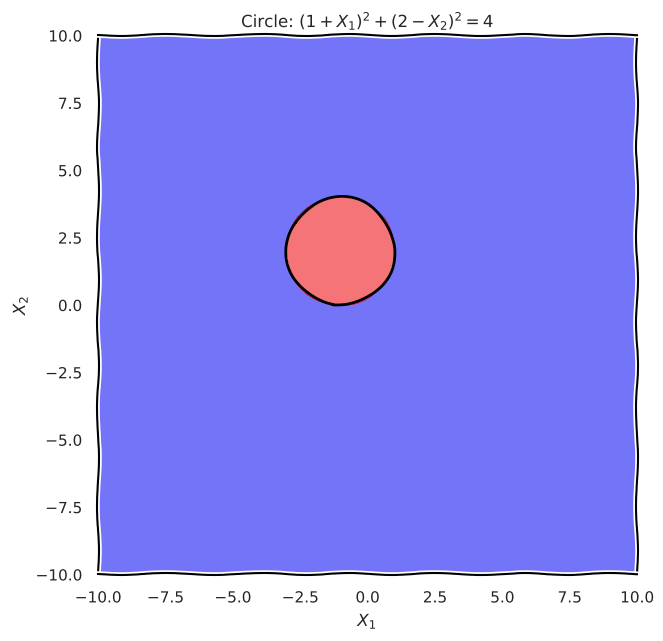

In [5]:
with plt.xkcd():
    plt.rcParams["font.family"] = "DejaVu Sans"  # to get rid of xkcd font warnings

    def f(x, y):
        return (1 + x) ** 2 + (2 - y) ** 2 - 4

    # Create a grid of x and y values
    x1 = np.linspace(-10, 10, 400)
    x2 = np.linspace(-10, 10, 400)
    X1, X2 = np.meshgrid(x1, x2)
    Z = f(X1, X2)

    fig, ax = plt.subplots(figsize=(8, 7))

    # Plot the contour where f(x, y) = 0
    ax.contour(X1, X2, Z, levels=[0], colors="black")

    ax.contourf(X1, X2, Z, levels=[0, np.inf], colors="blue", alpha=0.5)
    ax.contourf(X1, X2, Z, levels=[-np.inf, 0], colors="red", alpha=0.5)

    # Ensure the plot isn’t distorted
    plt.gca().set_aspect("equal")
    ax.set_xlabel("$X_1$")
    ax.set_ylabel("$X_2$")
    ax.set_title("Circle: $(1 + X_1)^2 + (2 - X_2)^2 = 4$")


The blue region indicates the set of points for which
$$
(1 + X_1)^2 + (2 - X_2)^2 \gt 4
$$

The red region and the black circle indicate the set of points for which
$$
(1 + X_1)^2 + (2 - X_2)^2 \le 4
$$

**(c)**  

In [6]:
def f(x1, x2):
    return (1 + x1) ** 2 + (2 - x2) ** 2

Plugging all the points into the equation for the curve, then classifiying results greater than 4 as blue and less than 4 as red:

In [7]:
f(0, 0)

5

In [8]:
f(-1, 1)

1

In [9]:
f(2, 2)

9

In [10]:
f(3, 8)

52

Point (0, 0) is classified as blue. \
Point (-1, 1) is classified as red. \
Point (2, 2) is classified as blue. \
Point (3, 8) is classified as blue.

**(d)** This can be shown easily by expanding the squares:
$$
\begin{align*}
(1 + X_1) ^ 2 + (2 - X_2)^2 &> 4 \\
1 - 2 X_1 + X_1 ^2  + 4 + 4 X_2 + X_2^2 &> 4 \\
- 2 X_1 + X_1 ^2  + 4 X_2 + X_2^2 &> -1
\end{align*}
$$
We can see that the decision boundary here is linear in terms of $X_1, X_1^2, X_2, X_2^2$

### **Q3.**

**(a)**

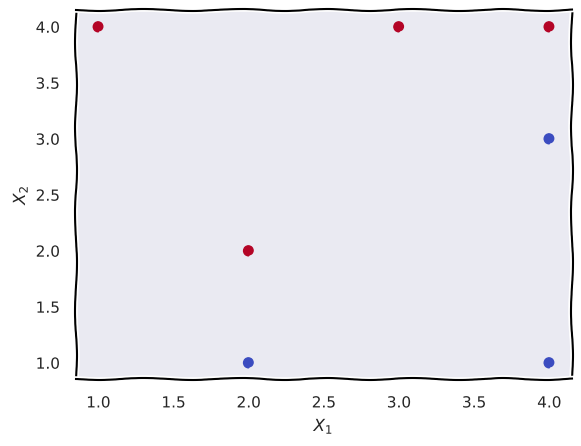

In [11]:
with plt.xkcd():
    plt.rcParams["font.family"] = "DejaVu Sans"  # to get rid of xkcd font warnings

    x1 = [3, 2, 4, 1, 2, 4, 4]
    x2 = [4, 2, 4, 4, 1, 3, 1]
    y = [1, 1, 1, 1, 0, 0, 0]

    fig, ax = plt.subplots()
    ax.scatter(x1, x2, c=y, cmap=plt.cm.coolwarm)

    ax.set_xlabel("$X_1$")
    ax.set_ylabel("$X_2$")

**(b)**

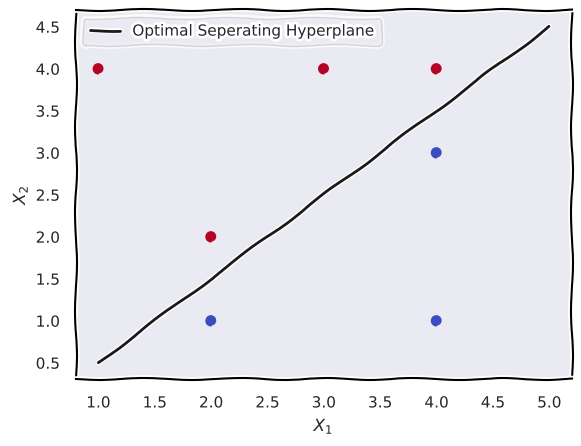

In [12]:
with plt.xkcd():
    plt.rcParams["font.family"] = "DejaVu Sans"  # to get rid of xkcd font warnings

    x = np.linspace(1, 5, 100)
    osh = -0.5 + x  # optimal seperating hyperplane
    ax.plot(x, osh, color="k", label="Optimal Seperating Hyperplane")

    ax.legend()

fig

The equation for this hyperplane is:
$$
-0.5 + X_1 - X_2 = 0
$$

**(c)**
Classify as blue if:
$$
-0.5 + X_1 - X_2 < 0
$$

Classify as red if:
$$
-0.5 + X_1 - X_2 > 0
$$

**(d)**

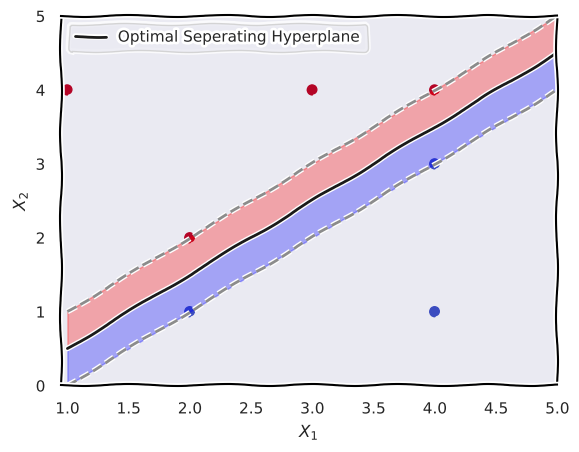

In [13]:
with plt.xkcd():
    plt.rcParams["font.family"] = "DejaVu Sans"  # to get rid of xkcd font warnings

    x = np.linspace(1, 5, 100)
    osh = -0.5 + x  # optimal seperating hyperplane
    margin = 0.5

    ax.plot(x, osh + margin, "k--", alpha=0.5)
    ax.plot(x, osh - margin, "k--", alpha=0.5)

    ax.fill_between(x, osh - margin, osh, color="blue", alpha=0.3)
    ax.fill_between(x, osh, osh + margin, color="red", alpha=0.3)

    ax.margins(x=0, y=0)
    ax.set_xlim([x.min() - 0.05, x.max()])

fig

**(e)**

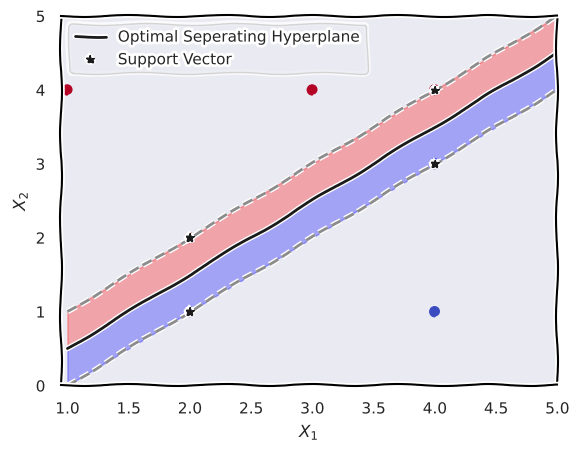

In [14]:
with plt.xkcd():
    plt.rcParams["font.family"] = "DejaVu Sans"  # to get rid of xkcd font warnings

    support_vectors = [(2, 1), (4, 3), (2, 2), (4, 4)]
    ax.plot(*zip(*support_vectors), "*k", label="Support Vector")
    ax.legend()

fig

**(f)** The movement of the seventh observation (4, 1) would not affect the hyperplane as long as it doesn't cross the margin, because it it's not a support vector and our maximal margin classifier is determined using only the 4 support vectors. 

**(g)** 

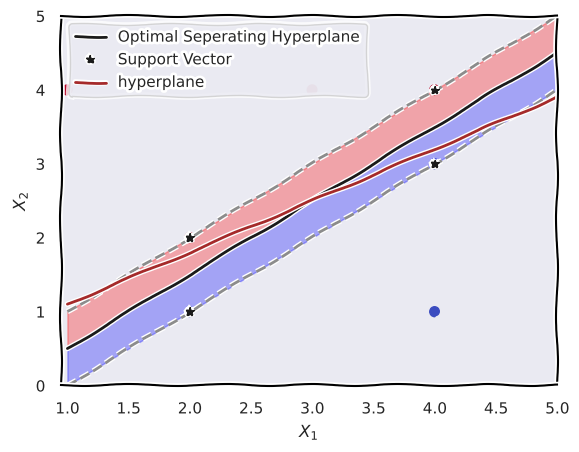

In [15]:
with plt.xkcd():
    plt.rcParams["font.family"] = "DejaVu Sans"  # to get rid of xkcd font warnings

    x = np.linspace(1, 5, 100)
    hyperplane = 0.4 + 0.7 * x
    ax.plot(x, hyperplane, color="brown", label="hyperplane")

    ax.legend()
fig

The equation for that hyperplane is:
$$
0.4 + 0.7 X_1 - X_2 = 0
$$

**(h)**

We'll just add the observation:
$$
X_1 = 1.5, \quad X_2 = 3, \quad Y = Blue
$$

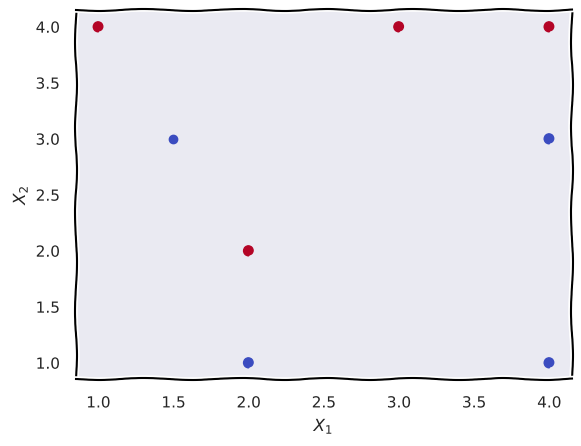

In [16]:
with plt.xkcd():
    plt.rcParams["font.family"] = "DejaVu Sans"  # to get rid of xkcd font warnings

    x1 = [3, 2, 4, 1, 2, 4, 4]
    x2 = [4, 2, 4, 4, 1, 3, 1]
    y = [1, 1, 1, 1, 0, 0, 0]

    fig, ax = plt.subplots()
    ax.scatter(x1, x2, c=y, cmap=plt.cm.coolwarm)

    ax.set_xlabel("$X_1$")
    ax.set_ylabel("$X_2$")

    # adding a point so the points are no longer linearly seperable
    p = (1.5, 3)
    ax.scatter(p[0], p[1], c=0, cmap=plt.cm.coolwarm)

## Applied

### **Q4.**

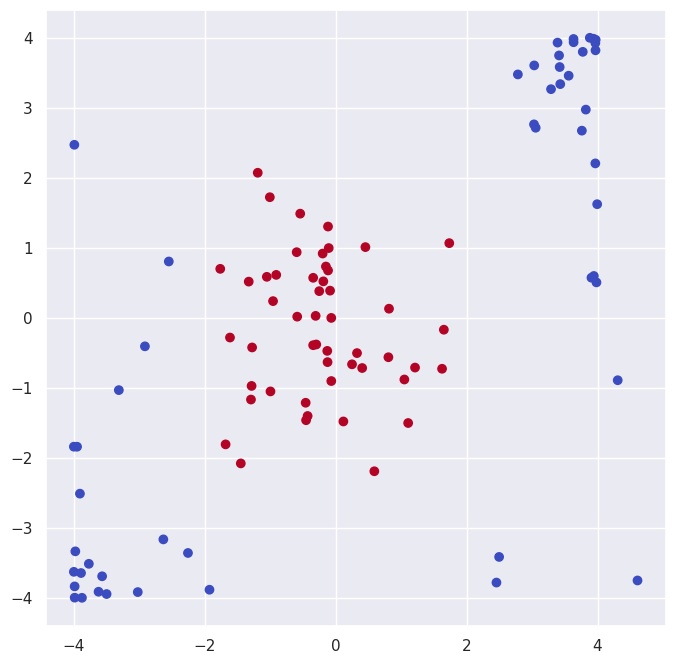

In [17]:
rng = np.random.default_rng(10)
X = rng.standard_normal((100, 2))

X[:25] = -(X[:25] ** 2) + 4
X[75:100] = X[75:100] ** 2 - 4

y = np.array([-1] * 25 + [1] * 50 + [-1] * 25)

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm);

In [18]:
X_train, X_test, y_train, y_test = skm.train_test_split(
    X, y, test_size=0.3, random_state=1
)

Now that we generated our data with non-linear separation, we'll fit three SVMs with linear, polynomial and radial kernels.

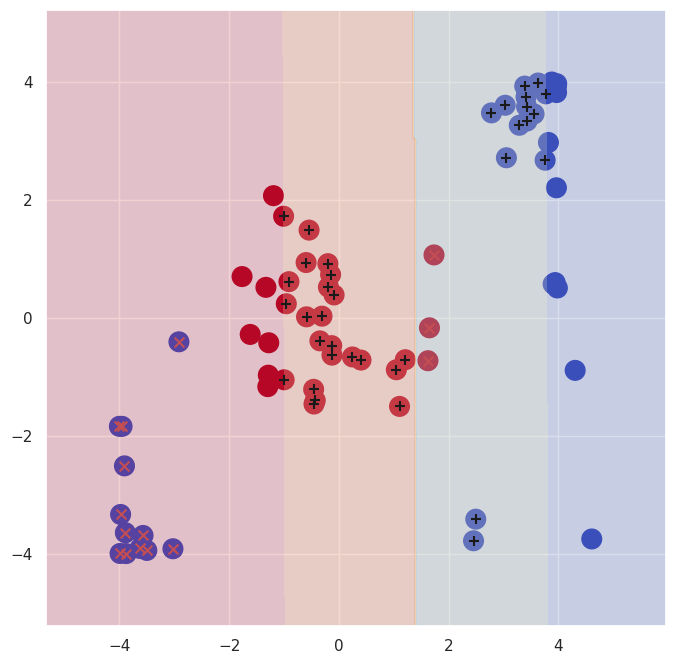

In [19]:
svm_linear = SVC(C=10, kernel="linear")
svm_linear.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(8, 8))
plot_svm(
    X_train,
    y_train,
    svm_linear,
    ax=ax,
    decision_cmap=plt.cm.RdYlBu_r,
    scatter_cmap=plt.cm.coolwarm,
)

In [20]:
linear_acc = accuracy_score(y_test, svm_linear.predict(X_test))
linear_acc

0.7

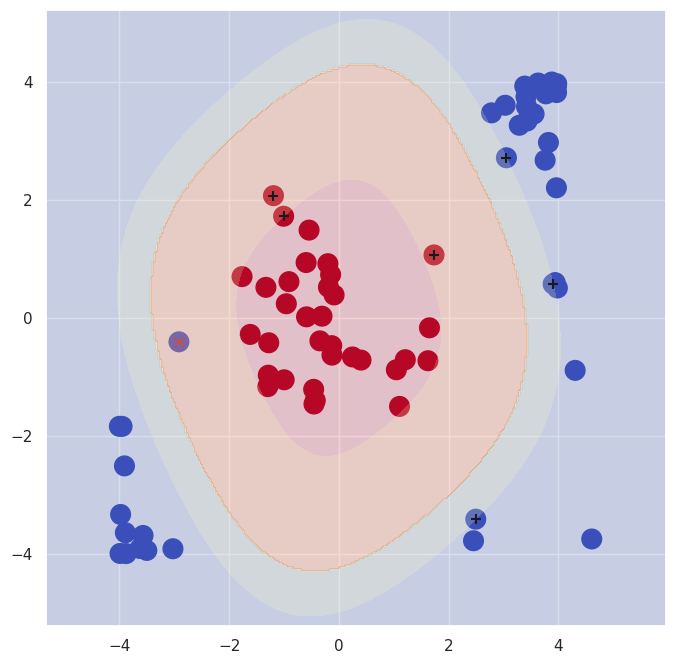

In [21]:
svm_poly = SVC(C=1, kernel="poly", degree=4)
svm_poly.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(8, 8))
plot_svm(
    X_train,
    y_train,
    svm_poly,
    ax=ax,
    decision_cmap=plt.cm.RdYlBu_r,
    scatter_cmap=plt.cm.coolwarm,
)

In [22]:
poly_acc = accuracy_score(y_test, svm_poly.predict(X_test))
poly_acc

0.9666666666666667

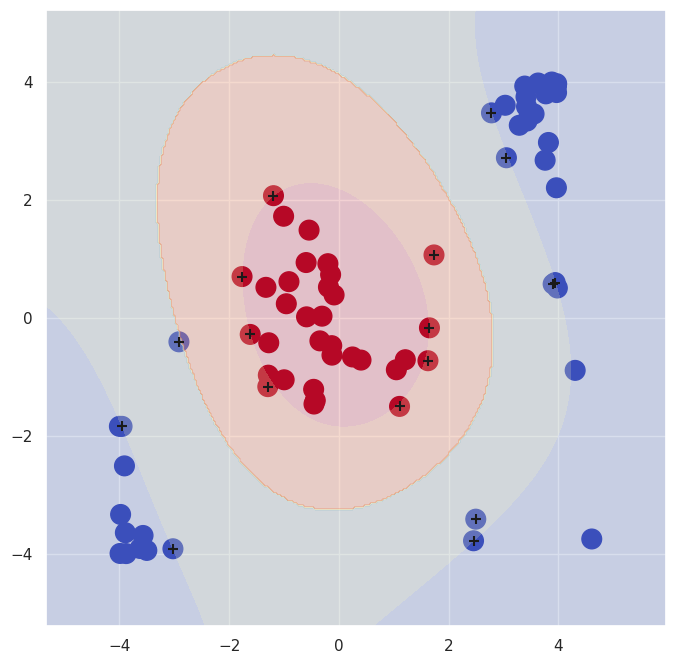

In [23]:
svm_rbf = SVC(C=1, kernel="rbf")
svm_rbf.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(8, 8))
plot_svm(
    X_train,
    y_train,
    svm_rbf,
    ax=ax,
    decision_cmap=plt.cm.RdYlBu_r,
    scatter_cmap=plt.cm.coolwarm,
)


In [24]:
rbf_acc = accuracy_score(y_test, svm_rbf.predict(X_test))
rbf_acc

0.9666666666666667

Now we'll print the training and test accuracy for each kernel:

Training error:

In [25]:
print(f"Linear: {svm_linear.score(X_train, y_train) * 100:.2f}%")
print(f"Polynomial: {svm_poly.score(X_train, y_train) * 100:.2f}%")
print(f"RBF: {svm_rbf.score(X_train, y_train) * 100:.2f}%")

Linear: 78.57%
Polynomial: 98.57%
RBF: 100.00%


Test error:

In [26]:
print(f"Linear: {linear_acc * 100:.2f}%")
print(f"Polynomial: {poly_acc * 100:.2f}%")
print(f"RBF: {rbf_acc * 100:.2f}%")

Linear: 70.00%
Polynomial: 96.67%
RBF: 96.67%


We can see that the SVM with the linear decision boundary performs the worst here, while the polynomial and rbf boundaries perform pretty well.

### **Q5.**

**(a)**

In [27]:
rng = np.random.default_rng(5)
x1 = rng.uniform(size=500) - 0.5
x2 = rng.uniform(size=500) - 0.5
y = x1**2 - x2**2 > 0

**(b)**

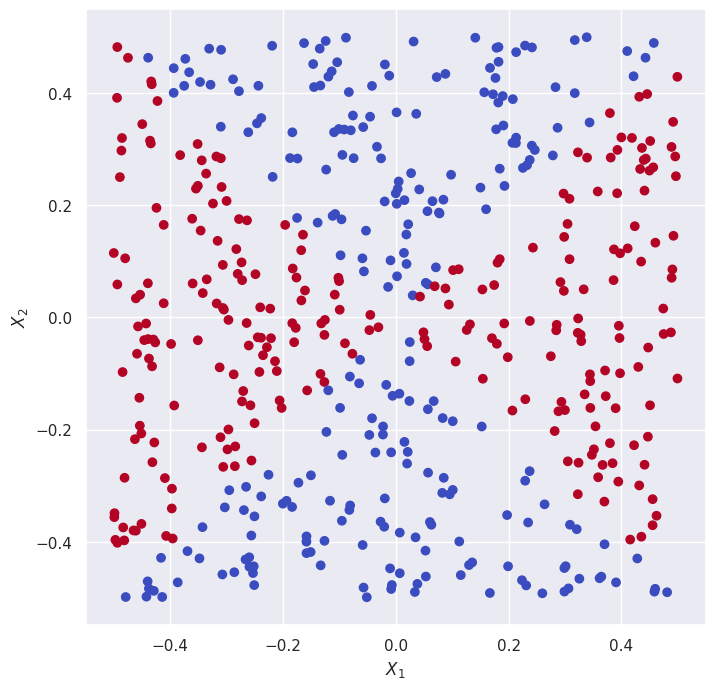

In [28]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x1, x2, c=y, cmap=plt.cm.coolwarm)
ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$");

**(c)**

In [29]:
X = np.column_stack((x1, x2))
lr = skl.LogisticRegression().fit(X, y)
pred = lr.predict(X)

**(d)**

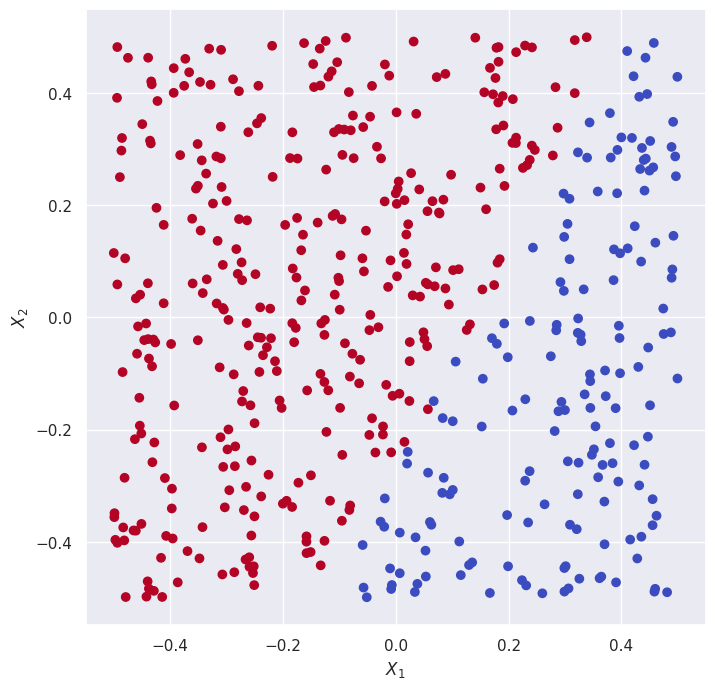

In [30]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x1, x2, c=pred, cmap=plt.cm.coolwarm)
ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$");

**(e)**

In [31]:
X = np.column_stack((x1, np.square(x1), x2, np.square(x2)))
lr = skl.LogisticRegression().fit(X, y)
pred = lr.predict(X)

**(f)**

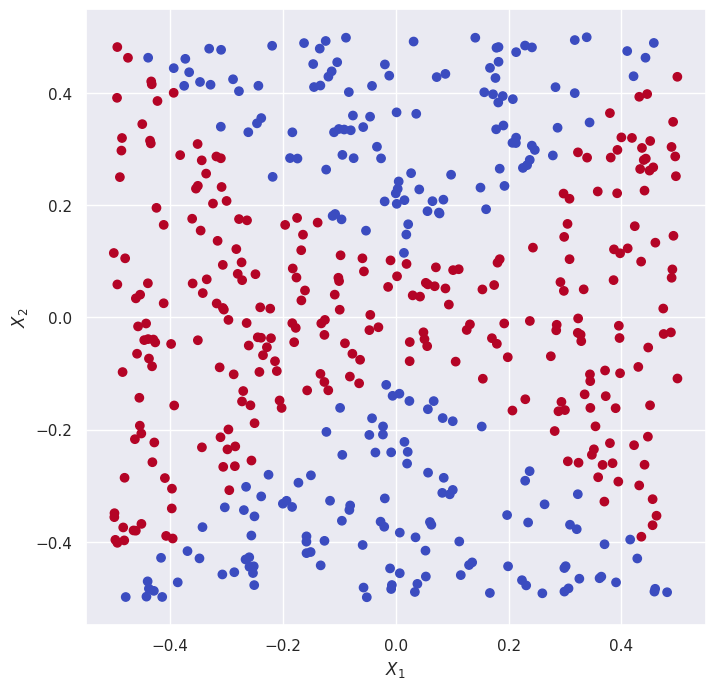

In [32]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x1, x2, c=pred, cmap=plt.cm.coolwarm)
ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$");

**(g)**

In [33]:
X = np.column_stack((x1, x2))
svm_linear = SVC(C=10, kernel="linear").fit(X, y)
pred = svm_linear.predict(X)

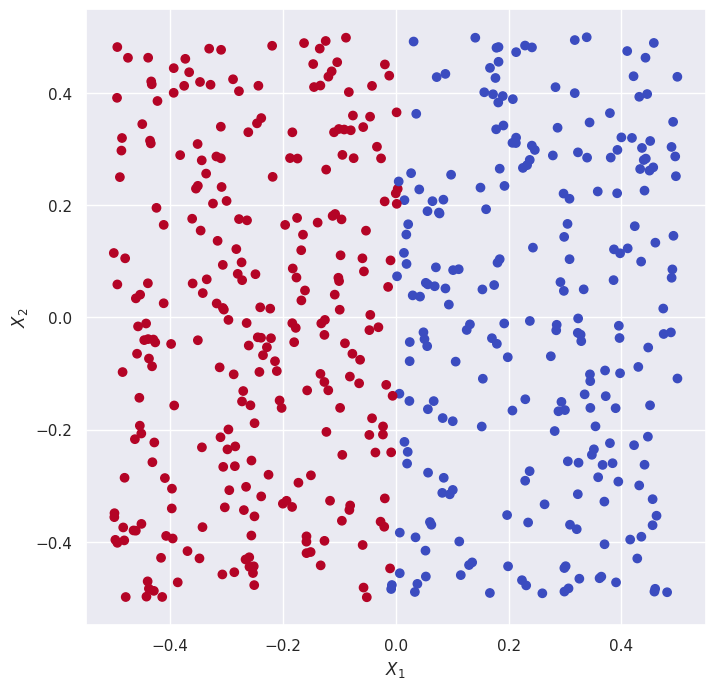

In [34]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x1, x2, c=pred, cmap=plt.cm.coolwarm)
ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$");

**(h)**

In [35]:
X = np.column_stack((x1, x2))
svm = SVC(C=1, kernel="rbf").fit(X, y)
pred = svm.predict(X)

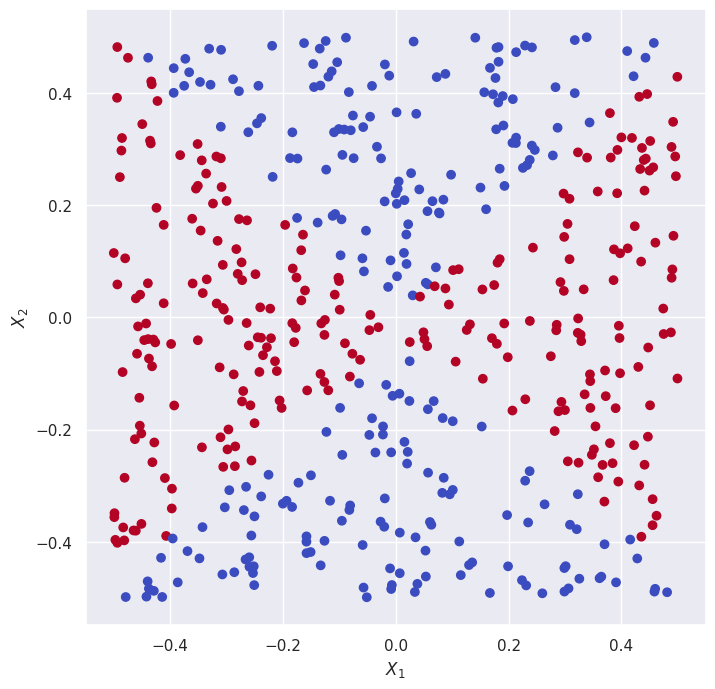

In [36]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x1, x2, c=pred, cmap=plt.cm.coolwarm)
ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$");

**(i)**

We can see that both the logistic regression fit on the original features and the linear SVM create a decision boundary that is far from the true non-linear decision boundary which is obvious considering they're both linear methods.

The logistic regression fit using non-linear terms $X_1, X_1^2, X_2, X_2^2$ and the SVM using the rbf kernel construct a decision boundary much closer to the true underlying decision boundary.

### **Q6.**

### **Q7.**

### **Q8.**

In [85]:
oj = load_data("OJ")
oj.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [86]:
oj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Purchase        1070 non-null   category
 1   WeekofPurchase  1070 non-null   int64   
 2   StoreID         1070 non-null   int64   
 3   PriceCH         1070 non-null   float64 
 4   PriceMM         1070 non-null   float64 
 5   DiscCH          1070 non-null   float64 
 6   DiscMM          1070 non-null   float64 
 7   SpecialCH       1070 non-null   int64   
 8   SpecialMM       1070 non-null   int64   
 9   LoyalCH         1070 non-null   float64 
 10  SalePriceMM     1070 non-null   float64 
 11  SalePriceCH     1070 non-null   float64 
 12  PriceDiff       1070 non-null   float64 
 13  Store7          1070 non-null   category
 14  PctDiscMM       1070 non-null   float64 
 15  PctDiscCH       1070 non-null   float64 
 16  ListPriceDiff   1070 non-null   float64 
 17  STORE         

In [87]:
oj.describe()

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,254.381308,3.959813,1.867421,2.085411,0.051860,0.123364,0.147664,0.161682,0.565782,1.962047,1.815561,0.146486,0.059298,0.027314,0.217991,1.630841
std,15.558286,2.308984,0.101970,0.134386,0.117474,0.213834,0.354932,0.368331,0.307843,0.252697,0.143384,0.271563,0.101760,0.062232,0.107535,1.430387
min,227.000000,1.000000,1.690000,1.690000,0.000000,0.000000,0.000000,0.000000,0.000011,1.190000,1.390000,-0.670000,0.000000,0.000000,0.000000,0.000000
25%,240.000000,2.000000,1.790000,1.990000,0.000000,0.000000,0.000000,0.000000,0.325257,1.690000,1.750000,0.000000,0.000000,0.000000,0.140000,0.000000
50%,257.000000,3.000000,1.860000,2.090000,0.000000,0.000000,0.000000,0.000000,0.600000,2.090000,1.860000,0.230000,0.000000,0.000000,0.240000,2.000000
75%,268.000000,7.000000,1.990000,2.180000,0.000000,0.230000,0.000000,0.000000,0.850873,2.130000,1.890000,0.320000,0.112676,0.000000,0.300000,3.000000
max,278.000000,7.000000,2.090000,2.290000,0.500000,0.800000,1.000000,1.000000,0.999947,2.290000,2.090000,0.640000,0.402010,0.252688,0.440000,4.000000


In [88]:
oj.describe(include='category')

,Purchase,Store7
count,1070,1070
unique,2,2
top,CH,No
freq,653,714


**(a)**

In [89]:
design = MS(oj.columns.drop('Purchase'), intercept=False).fit(oj)
X = design.transform(oj)
y = oj['Purchase']
X_train, X_test, y_train, y_test = skm.train_test_split(X, y, train_size=800, random_state=1)

**(b)** 

In [90]:
linear_svc = SVC(C=0.01, kernel='linear').fit(X_train, y_train)
linear_svc.support_vectors_.shape

(611, 17)

There are 611 support vectors.

**(c)**

Training error rate:

In [91]:
1 - linear_svc.score(X_train, y_train)

0.31000000000000005

Test error rate:

In [92]:
1 - linear_svc.score(X_test, y_test)

0.3592592592592593

**(d)**

In [93]:
kfold = skm.KFold(n_splits=5, shuffle=True, random_state=3)

linear_svc = SVC(C=0.01, kernel='linear')

param_grid = {'C': np.linspace(0.01, 10, 16)}

grid = skm.GridSearchCV(linear_svc,
                        param_grid=param_grid,
                        cv=kfold).fit(X_train, y_train)
best_linear_svc = grid.best_estimator_
best_linear_svc

SVC(C=8.668000000000001, kernel='linear')

**(e)**

In [94]:
best_lin_train_err = 1 - best_linear_svc.score(X_train, y_train)
best_lin_test_err = 1 - best_linear_svc.score(X_test, y_test)
best_lin_train_err, best_lin_test_err

(0.16249999999999998, 0.1777777777777778)

**(f)**

In [95]:
svm_rbf = SVC(C=0.01, kernel='rbf').fit(X_train, y_train)
svm_rbf.support_vectors_.shape

(608, 17)

In [96]:
1 - svm_rbf.score(X_train, y_train), 1 - svm_rbf.score(X_test, y_test)

(0.38, 0.4185185185185185)

In [97]:
svm_rbf = SVC(C=0.01, kernel='rbf')

param_grid = {'C': np.linspace(0.01, 10, 100)}

grid = skm.GridSearchCV(svm_rbf,
                        param_grid=param_grid,
                        cv=kfold).fit(X_train, y_train)
best_svm_rbf = grid.best_estimator_
best_svm_rbf

SVC(C=0.01)

In [98]:
best_rbf_train_err = 1 - best_svm_rbf.score(X_train, y_train)
best_rbf_test_err = 1 - best_svm_rbf.score(X_test, y_test)
best_rbf_train_err, best_rbf_test_err

(0.38, 0.4185185185185185)

**(g)**

In [99]:
svm_poly = SVC(C=0.01, kernel='poly', degree=2).fit(X_train, y_train)
svm_poly.support_vectors_.shape

(608, 17)

In [100]:
1 - svm_poly.score(X_train, y_train), 1 - svm_poly.score(X_test, y_test)

(0.38, 0.4185185185185185)

In [101]:
svm_poly = SVC(C=0.01, kernel='rbf')

param_grid = {'C': np.linspace(0.01, 10, 100)}

grid = skm.GridSearchCV(svm_poly,
                        param_grid=param_grid,
                        cv=kfold).fit(X_train, y_train)
best_svm_poly = grid.best_estimator_
best_svm_poly

SVC(C=0.01)

In [102]:
best_poly_train_err = 1 - best_svm_poly.score(X_train, y_train)
best_poly_test_err = 1 - best_svm_poly.score(X_test, y_test)
best_poly_train_err, best_poly_test_err

(0.38, 0.4185185185185185)

**(h)**

We can see that the linear SVC does the best on this data out of the three methods used.

In [103]:
print('Training Error Rates:')
print(f"Linear: {best_lin_train_err * 100:.2f}%")
print(f"Polynomial: {best_poly_train_err * 100:.2f}%")
print(f"RBF: {best_rbf_train_err * 100:.2f}%")


Training Error Rates:
Linear: 16.25%
Polynomial: 38.00%
RBF: 38.00%


In [104]:
print('Test Error Rates:')
print(f"Linear: {best_lin_test_err * 100:.2f}%")
print(f"Polynomial: {best_poly_test_err * 100:.2f}%")
print(f"RBF: {best_rbf_test_err * 100:.2f}%")

Test Error Rates:
Linear: 17.78%
Polynomial: 41.85%
RBF: 41.85%
